In [1]:
import numpy as np
import cv2
import pandas as pd 
from imutils import paths
import os
import matplotlib.pyplot as plt
from PIL import Image 
from skimage.color import rgb2gray
from deepface import DeepFace

In [2]:
#imagepath=list(paths.list_images(r"C:\Users\bhavy\OneDrive\Desktop\facial emotion recognition\archive (8)\images\images"))

In [2]:
train_dir=r'C:\Users\bhavy\OneDrive\Desktop\facial emotion recognition\archive (8)\images\train'
test_dir=r'C:\Users\bhavy\OneDrive\Desktop\facial emotion recognition\archive (8)\images\test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
    return image_paths,labels

In [4]:
train_df = pd.DataFrame()
train_df['image'], train_df['label'] = createdataframe(train_dir)

In [5]:
train_df.head(5)

,image,label
0,C:\Users\bhavy\OneDrive\Desktop\facial emotion...,angry
1,C:\Users\bhavy\OneDrive\Desktop\facial emotion...,angry
2,C:\Users\bhavy\OneDrive\Desktop\facial emotion...,angry
3,C:\Users\bhavy\OneDrive\Desktop\facial emotion...,angry
4,C:\Users\bhavy\OneDrive\Desktop\facial emotion...,angry


In [6]:
test_df = pd.DataFrame()
test_df['image'], test_df['label'] = createdataframe(test_dir)

In [8]:
# def extract_features(images):
#     features = []
#     for image in images:
#         img = cv2.imread(image)
#         img = rgb2gray(img)
#         img = np.array(img)
#         features.append(img)
#     features = np.array(features)
#     print(features.shape)
#     features = features.reshape(len(features),48,48,1)
#     return features

In [9]:
# objs = DeepFace.analyze(img_path = r"C:\Users\bhavy\OneDrive\Desktop\facial emotion recognition\archive (8)\images\train\angry\0.jpg", 
#         actions = ['emotion'])

In [10]:
# def hog(img):
#     hog = cv2.HOGDescriptor()
#     hog_fet=[]
#     for image in img:
#         temp=cv2.imread(image)
#         temp = rgb2gray(temp)
#         umat_img = cv2.UMat(temp)
#         temp=temp.astype(np.uint8)
#         hog_features = hog.compute(temp)
#         hog_fet.append(hog_features)
#     hog_features = np.array(hog_features)
#     print(hog_fet.shape)
#     return hog_fet


In [7]:
def canny(images):
    canny_feature=[]
    for image in images:
        image=cv2.imread(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        canny_feature.append(edges)
    canny_feature = np.array(canny_feature)
    print(canny_feature.shape)
    return canny_feature

In [8]:
train_canny_feature= canny(train_df['image'])

(28821, 48, 48)


In [10]:
#train_canny_dataframe=pd.DataFrame(train_canny_feature,columns=[f'{i}' for i in range(900)])

In [14]:
#test_canny_feature=canny(test_df['image'])

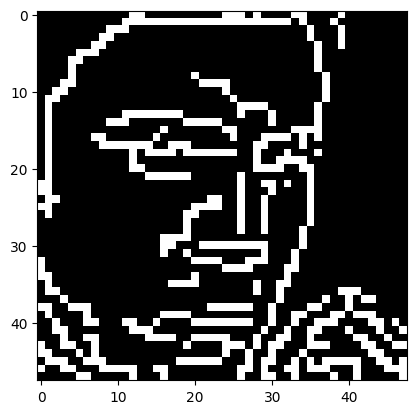

In [11]:
plt.imshow(train_canny_feature[0],cmap='gray')

In [13]:
from skimage.feature import hog

In [14]:
def calculate_hog(images):
    hog_features = []          

    for image in images:
        image = cv2.imread(image)
        # Convert the image to grayscale if necessary
        if len(image.shape) > 2:
            gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_img = image

        # Ensure the image has the correct data type
        if gray_img.dtype != np.uint8:
            gray_img = gray_img.astype(np.uint8)

        # Compute HOG features for each image
        hog_features.append(hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys'))

    # Convert hog_features to a numpy array
    hog_features = np.array(hog_features)
    print(hog_features.shape)
    return hog_features

In [15]:
train_hog_feature=calculate_hog(train_df['image'])

(28821, 900)


In [16]:
test_hog_feature=calculate_hog(test_df['image'])

(7066, 900)


In [17]:
train_hog_dataframe=pd.DataFrame(train_hog_feature,columns=[f'{i}' for i in range(900)])


In [18]:
test_hog_dataframe=pd.DataFrame(test_hog_feature,columns=[f'{i}' for i in range(900)])


In [19]:
train_hog_dataframe

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.222892,0.232045,0.332457,0.040897,0.186091,0.068355,0.046457,0.000000,0.082443,0.232365,...,0.139800,0.113258,0.008417,0.018679,0.029918,0.170385,0.178625,0.262547,0.248320,0.036854
1,0.225613,0.311206,0.311206,0.011380,0.071960,0.008527,0.000000,0.011704,0.030140,0.250802,...,0.243748,0.243748,0.098055,0.021563,0.040890,0.113735,0.025612,0.243748,0.243748,0.243748
2,0.288410,0.201642,0.000000,0.004631,0.037362,0.013818,0.063747,0.115038,0.209451,0.288410,...,0.057104,0.231496,0.231496,0.098205,0.210057,0.231496,0.090692,0.231496,0.147652,0.137645
3,0.296793,0.147788,0.043252,0.028072,0.094830,0.005848,0.019797,0.025989,0.072198,0.296793,...,0.008806,0.219967,0.184108,0.034243,0.019174,0.053556,0.035390,0.058375,0.076675,0.122077
4,0.307844,0.251823,0.000000,0.038463,0.022741,0.004825,0.004315,0.023122,0.205808,0.307844,...,0.021968,0.098677,0.018966,0.064930,0.066142,0.226711,0.054030,0.325360,0.174260,0.051481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28816,0.003781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087047,...,0.217222,0.305113,0.162900,0.000000,0.000000,0.001065,0.008583,0.062316,0.049337,0.076632
28817,0.275151,0.275151,0.275151,0.154843,0.065098,0.011660,0.030714,0.060797,0.028159,0.269537,...,0.034371,0.071644,0.034011,0.192200,0.039983,0.023045,0.010832,0.006208,0.011318,0.013881
28818,0.240040,0.240040,0.240040,0.058241,0.139939,0.071587,0.037301,0.015310,0.080138,0.240040,...,0.114461,0.212843,0.301221,0.282342,0.068842,0.301221,0.301221,0.301221,0.051342,0.135910
28819,0.371669,0.371669,0.371669,0.010387,0.007349,0.002582,0.012802,0.010616,0.181130,0.185478,...,0.156979,0.332977,0.320607,0.039131,0.162560,0.332977,0.332977,0.332977,0.067395,0.235089


In [24]:
# zero_columns = train_hog_dataframe.columns[(train_hog_dataframe == 0).all()]
# train_hog_dataframe = train_hog_dataframe.drop(columns=zero_columns)

In [25]:
#train_hog_dataframe.shape

In [26]:
# zero_columns = test_hog_dataframe.columns[(test_hog_dataframe == 0).all()]
# test_hog_dataframe = test_hog_dataframe.drop(columns=zero_columns)

In [27]:
#test_hog_dataframe.shape

In [20]:
train_df['label'].shape

(28821,)

In [21]:
train_df['label']

0           angry
1           angry
2           angry
3           angry
4           angry
           ...   
28816    surprise
28817    surprise
28818    surprise
28819    surprise
28820    surprise
Name: label, Length: 28821, dtype: object

In [22]:
train_hog_dataframe.insert(900,'label',train_df['label'].to_numpy())

In [23]:
train_df['label'].value_counts()

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [24]:
test_hog_dataframe.insert(900,'label',test_df['label'].to_numpy())

In [25]:
train_hog_dataframe

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,label
0,0.222892,0.232045,0.332457,0.040897,0.186091,0.068355,0.046457,0.000000,0.082443,0.232365,...,0.113258,0.008417,0.018679,0.029918,0.170385,0.178625,0.262547,0.248320,0.036854,angry
1,0.225613,0.311206,0.311206,0.011380,0.071960,0.008527,0.000000,0.011704,0.030140,0.250802,...,0.243748,0.098055,0.021563,0.040890,0.113735,0.025612,0.243748,0.243748,0.243748,angry
2,0.288410,0.201642,0.000000,0.004631,0.037362,0.013818,0.063747,0.115038,0.209451,0.288410,...,0.231496,0.231496,0.098205,0.210057,0.231496,0.090692,0.231496,0.147652,0.137645,angry
3,0.296793,0.147788,0.043252,0.028072,0.094830,0.005848,0.019797,0.025989,0.072198,0.296793,...,0.219967,0.184108,0.034243,0.019174,0.053556,0.035390,0.058375,0.076675,0.122077,angry
4,0.307844,0.251823,0.000000,0.038463,0.022741,0.004825,0.004315,0.023122,0.205808,0.307844,...,0.098677,0.018966,0.064930,0.066142,0.226711,0.054030,0.325360,0.174260,0.051481,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28816,0.003781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087047,...,0.305113,0.162900,0.000000,0.000000,0.001065,0.008583,0.062316,0.049337,0.076632,surprise
28817,0.275151,0.275151,0.275151,0.154843,0.065098,0.011660,0.030714,0.060797,0.028159,0.269537,...,0.071644,0.034011,0.192200,0.039983,0.023045,0.010832,0.006208,0.011318,0.013881,surprise
28818,0.240040,0.240040,0.240040,0.058241,0.139939,0.071587,0.037301,0.015310,0.080138,0.240040,...,0.212843,0.301221,0.282342,0.068842,0.301221,0.301221,0.301221,0.051342,0.135910,surprise
28819,0.371669,0.371669,0.371669,0.010387,0.007349,0.002582,0.012802,0.010616,0.181130,0.185478,...,0.332977,0.320607,0.039131,0.162560,0.332977,0.332977,0.332977,0.067395,0.235089,surprise


In [26]:
test_hog_dataframe

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,label
0,0.298782,0.298782,0.298782,0.077392,0.103885,0.014714,0.000000,0.000000,0.022984,0.298782,...,0.138526,0.112578,0.065176,0.066929,0.086594,0.017740,0.022531,0.012522,0.007398,angry
1,0.266857,0.341132,0.128690,0.017587,0.070329,0.000000,0.000000,0.038689,0.132946,0.341132,...,0.013089,0.130279,0.228141,0.085495,0.316764,0.064308,0.076993,0.091945,0.112680,angry
2,0.331844,0.328328,0.200875,0.033073,0.136893,0.003638,0.073311,0.119833,0.046822,0.096276,...,0.265773,0.029358,0.086335,0.073341,0.202186,0.052167,0.085799,0.099861,0.162850,angry
3,0.072126,0.068711,0.150844,0.073876,0.215846,0.278132,0.195698,0.059743,0.046397,0.130290,...,0.280890,0.280890,0.001584,0.015336,0.008962,0.011034,0.033182,0.231231,0.097404,angry
4,0.033660,0.002428,0.009366,0.000000,0.031489,0.000000,0.000000,0.000000,0.000000,0.024064,...,0.316947,0.390700,0.002214,0.004214,0.002348,0.003227,0.001107,0.003913,0.019814,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,0.234881,0.329345,0.075212,0.017887,0.004760,0.002129,0.003837,0.000710,0.026593,0.261994,...,0.268007,0.268007,0.268007,0.087996,0.125173,0.093778,0.035149,0.030238,0.096325,surprise
7062,0.106526,0.039474,0.174603,0.193117,0.152704,0.011847,0.034903,0.008932,0.004623,0.183890,...,0.227982,0.069795,0.019175,0.038460,0.041089,0.006337,0.001660,0.002625,0.050275,surprise
7063,0.122874,0.306200,0.235131,0.028112,0.058825,0.046862,0.051683,0.015450,0.000000,0.111153,...,0.268596,0.237367,0.139502,0.203094,0.268596,0.125519,0.268596,0.137107,0.268596,surprise
7064,0.300694,0.085754,0.030353,0.177233,0.205784,0.103411,0.281527,0.138960,0.230250,0.061799,...,0.341535,0.168287,0.146706,0.126358,0.075231,0.041605,0.019860,0.145495,0.136365,surprise


In [27]:
x_train=train_hog_dataframe.drop(columns=['label'])


In [28]:
y_train=train_hog_dataframe['label']


In [29]:
x_test=test_hog_dataframe.drop(columns=['label'])


In [30]:
y_test=test_hog_dataframe['label']


PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
x_train.shape

(28821, 900)

In [33]:
pca = PCA()
test=pca.fit(x_train)

In [34]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)

In [35]:
k

268

In [36]:
pca1=PCA(n_components=k)
x_train=pca1.fit_transform(x_train)

In [37]:
x_train.shape

(28821, 268)

In [38]:
x_test=pca1.transform(x_test)

In [39]:
x_test.shape

(7066, 268)

In [40]:
x_train=pd.DataFrame(x_train)

In [41]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,0.010288,-0.237534,-1.043127,-1.010000,-0.465833,-0.055704,-0.459976,-0.045771,0.660514,-0.416066,...,-0.062845,-0.002488,-0.132685,0.112928,-0.071443,-0.067211,0.022250,0.071406,-0.067642,-0.062885
1,-0.422387,0.680886,-0.226004,0.802861,-0.647591,-0.538421,-0.301561,-0.133521,0.009747,0.169285,...,-0.065642,-0.121974,-0.080812,-0.024568,0.055492,0.083770,0.033255,0.011125,-0.085748,-0.053325
2,-0.508802,0.607060,-0.043744,0.273879,-0.099348,0.376093,-0.620171,-0.279939,0.127119,-0.321815,...,-0.005376,0.039707,0.071186,-0.123595,0.063874,-0.023748,-0.020011,-0.042202,-0.155560,0.095711
3,-0.402841,-0.799748,-0.128053,0.286208,-0.152762,0.534169,0.059765,-0.064396,0.534129,0.403740,...,0.051569,0.028526,0.023108,-0.000887,-0.019901,-0.045076,0.034929,0.027974,0.007377,0.013961
4,-0.291536,-0.916577,0.565689,-0.573413,-0.581014,-0.092287,-0.348661,0.377526,-0.010574,0.002991,...,0.035488,-0.047966,-0.128044,-0.094104,-0.022543,0.018088,-0.072723,0.062882,-0.108618,-0.091645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28816,-0.226990,-0.128487,0.619154,0.418824,-0.126619,0.611350,-0.268233,0.042809,0.500395,0.373071,...,0.030569,0.060145,0.111600,0.031435,-0.022398,0.009784,-0.051261,-0.044171,0.098116,0.017864
28817,-0.421009,-0.717889,0.077399,-0.153443,-0.024221,0.336575,-0.078575,-0.073002,0.291114,0.081338,...,-0.004505,-0.018130,0.005880,0.101546,0.017699,-0.009804,0.099887,0.235004,-0.006156,0.056257
28818,-0.366115,0.082560,-0.022007,0.834960,0.262166,0.277572,-0.086384,-0.125404,-0.755782,-0.299307,...,0.186995,0.119069,-0.055851,0.076662,0.054331,0.062264,0.010470,0.101035,-0.060762,-0.055826
28819,-0.207723,-0.416572,-0.239530,0.822727,-0.011381,-0.311977,-0.472782,-0.285647,-0.082443,-0.512874,...,-0.164957,0.058589,-0.067399,-0.057846,-0.185910,-0.109128,0.065048,-0.094705,-0.025665,0.086595


In [42]:
x_test=pd.DataFrame(x_test)

In [43]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,0.811209,-0.513334,0.374182,-0.138799,-0.500854,-0.044852,-0.348952,0.326760,0.208709,0.251944,...,0.008950,-0.034921,0.031065,-0.034822,-0.036629,0.164900,0.143000,0.007588,-0.094826,0.055419
1,1.217523,-0.559677,-0.277383,0.782193,0.381397,-0.084973,-0.267334,0.247827,-0.462553,0.181193,...,0.032415,-0.062432,-0.002073,-0.088684,0.026805,-0.162784,0.035282,-0.096312,0.094924,-0.048255
2,-0.070791,-0.175416,-0.387080,-0.478900,0.479144,0.069014,-0.459361,-0.164991,-0.313005,-0.116798,...,-0.120754,-0.044545,0.078098,-0.019237,0.049122,0.019176,0.103895,0.031329,0.060284,0.181008
3,-0.553757,0.966092,-0.465252,0.540544,-0.267051,0.027507,-0.305041,-0.359524,0.134408,-0.089267,...,0.008285,-0.054103,-0.121746,0.025348,-0.039322,-0.006072,-0.055968,0.093109,0.068900,-0.018055
4,-0.428583,-0.337247,-0.449310,1.398195,-0.280445,-0.015429,0.336332,-0.272520,0.378825,0.264514,...,0.015800,0.088841,-0.010106,-0.025528,-0.001435,-0.099991,-0.062051,0.045470,0.008470,0.059888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,-0.760006,-0.565600,-0.173200,0.016106,-0.090083,0.093498,0.322002,0.765449,-0.745140,0.145195,...,0.039765,-0.074829,-0.163181,-0.142331,-0.049896,0.090379,-0.037261,0.043494,0.008796,0.131123
7062,-0.903369,0.268573,-0.448545,0.357656,-0.532947,0.138137,0.158677,0.177638,0.205803,0.243363,...,0.042245,0.036878,0.039236,0.004627,-0.033980,0.030513,-0.022211,-0.059171,0.090463,-0.033158
7063,0.103903,0.088270,-0.340590,0.345360,-1.109902,0.187483,0.051080,-0.179368,0.094292,-0.004488,...,-0.026137,0.048586,-0.179658,0.024530,0.038616,-0.003202,-0.079329,0.070907,0.086526,-0.001487
7064,0.495006,0.172522,0.167447,-0.249302,0.012090,0.203774,0.059727,-0.561385,-0.106168,-0.399550,...,0.002739,0.029239,0.000493,0.067252,0.050917,0.076927,0.012120,0.180037,-0.041834,0.083837


Support vector machine

In [44]:
from sklearn.svm import SVC

In [45]:
svm_model = SVC(kernel='rbf', C=1.0)

In [46]:
svm_model.fit(x_train,y_train)

SVC()

In [47]:
svm_model.intercept_


array([ 0.90413927, -0.6619313 , -0.07867497, -0.41952642, -0.87423336,
        0.50277689, -1.0323965 , -0.90343105, -0.83742843, -1.03672963,
       -0.73568539,  0.2902355 ,  0.14104725, -0.3614164 ,  0.78398072,
       -0.29512284, -0.68606381,  0.4443444 , -0.56800312,  0.59537809,
        0.85265988])

In [57]:
#svm_model.coef_

In [48]:
y_pred = svm_model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
svm_report=classification_report(y_test,y_pred)
print(svm_report)

              precision    recall  f1-score   support

       angry       0.47      0.38      0.42       960
     disgust       1.00      0.23      0.37       111
        fear       0.47      0.32      0.38      1018
       happy       0.66      0.80      0.72      1825
     neutral       0.47      0.53      0.50      1216
         sad       0.39      0.47      0.43      1139
    surprise       0.71      0.59      0.64       797

    accuracy                           0.54      7066
   macro avg       0.60      0.47      0.49      7066
weighted avg       0.54      0.54      0.53      7066



In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5397679026323238

Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
c_model=LogisticRegression()

In [54]:
c_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
c_model.intercept_

array([ 0.48078917, -2.83058903,  0.5905737 ,  0.72644962,  0.70675605,
        0.73766574, -0.41164524])

In [56]:
c_model.coef_

array([[ 0.24473792,  0.33086692,  0.03560546, ...,  0.26354727,
        -0.30035358, -0.24311006],
       [-0.79607092,  0.33613123,  0.09536348, ..., -0.06494785,
        -0.53849166,  0.40775258],
       [ 0.13173066, -0.02209858, -0.14484917, ..., -0.1613226 ,
         0.37462699,  0.02312072],
       ...,
       [-0.07621439, -0.14882415,  0.0599668 , ..., -0.15145728,
         0.32766161, -0.01640765],
       [ 0.4891802 ,  0.53470684,  0.17664361, ..., -0.0356227 ,
        -0.05447994, -0.35663939],
       [-0.17731064, -1.02238866, -0.3735129 , ...,  0.21121062,
        -0.2017034 ,  0.14777921]])

In [57]:
y_pred1=c_model.predict(x_test)

In [58]:
c_report=classification_report(y_test,y_pred1)
print(c_report)

              precision    recall  f1-score   support

       angry       0.34      0.27      0.30       960
     disgust       0.41      0.15      0.22       111
        fear       0.30      0.20      0.24      1018
       happy       0.57      0.74      0.64      1825
     neutral       0.39      0.42      0.41      1216
         sad       0.31      0.31      0.31      1139
    surprise       0.52      0.51      0.52       797

    accuracy                           0.44      7066
   macro avg       0.41      0.37      0.38      7066
weighted avg       0.42      0.44      0.42      7066



Gridsearch

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
logreg = LogisticRegression()

In [95]:
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

In [96]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [97]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Best hyperparameters:  {'C': 10}
Best accuracy:  0.5490095656083488


Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [61]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred2 = rf_classifier.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.439569770733088


In [64]:
def calculate_hog1(image):
    hog_features = []          

    
        # Convert the image to grayscale if necessary
    if len(image.shape) > 2:
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = image

    # Ensure the image has the correct data type
    if gray_img.dtype != np.uint8:
        gray_img = gray_img.astype(np.uint8)

    # Compute HOG features for each image
    hog_features.append(hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys'))

    # Convert hog_features to a numpy array
    hog_features = np.array(hog_features)
    #print(hog_features.shape)
    return hog_features

In [65]:
def image_pca(df):
   
    
    pca3 = PCA()
    test=pca3.fit(df)
    var_cumu = np.cumsum(pca3.explained_variance_ratio_)*100
    q = np.argmax(var_cumu>95)
    
   
    df = df.reshape(1, -1)

    df=pca1.transform(df)
    
    
    return df

In [66]:
def predict_svm(image):
    
    x_image=calculate_hog1(image)
    
    x_image=image_pca(x_image)
   
    y_image=svm_model.predict(x_image)
    return y_image
       

In [67]:
img=cv2.imread(r'C:\Users\bhavy\OneDrive\Desktop\facial emotion recognition\archive (8)\images\train\disgust\416.jpg')
predict_svm(img)

array(['disgust'], dtype=object)

Pickle

In [98]:
import pickle
pickle_out=open('svm_model.pkl','wb') #wb write in binary
pickle.dump(svm_model,pickle_out)
pickle_out.close()

In [99]:
pickle_out=open('logistic_model.pkl','wb') #wb write in binary
pickle.dump(c_model,pickle_out)
pickle_out.close()

In [100]:
pickle_out=open('grid_search.pkl','wb') #wb write in binary
pickle.dump(grid_search,pickle_out)
pickle_out.close()

In [101]:
pickle_out=open('rf_classifier.pkl','wb') #wb write in binary
pickle.dump(rf_classifier,pickle_out)
pickle_out.close()

In [102]:
pickle_out=open('pca1.pkl','wb') #wb write in binary
pickle.dump(pca1,pickle_out)
pickle_out.close()

In [103]:
pickle_out=open('pca.pkl','wb') #wb write in binary
pickle.dump(pca,pickle_out)
pickle_out.close()